In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [34]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [35]:
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

KeyboardInterrupt: 

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

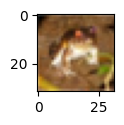

In [ ]:
plot_sample(0)

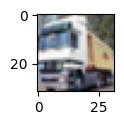

In [ ]:
plot_sample(1)

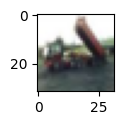

In [ ]:
plot_sample(2)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[y_train[0][0]]

'frog'

In [ ]:
classes[y_train[1][0]]

'truck'

In [ ]:
classes[y_train[3][0]]

'deer'

In [ ]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [36]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [37]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
)

In [38]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [39]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [40]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(2048,activation='relu'),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train_categorical,epochs=5)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.3459 - loss: 1.8236
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4248 - loss: 1.6273
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4542 - loss: 1.5417
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4751 - loss: 1.4776
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4954 - loss: 1.4244


In [41]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


np.int64(1)

In [42]:
y_test[0]

array([3], dtype=uint8)

In [43]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4840 - loss: 1.4624


[1.4623504877090454, 0.48399999737739563]